<h1 id="title">Sampling at 1 x Minority Class Size, Testing on All the Data, Predicting Motor Vehicle Accident Severity in Seattle, Washington<\h1>

In [1]:
# Import packages and modules.
import io
import itertools
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import pandas as pd
import pylab as pl
import scipy
import scipy.optimize as opt
import seaborn as sns
import sklearn
import sys
import timeit
import warnings
from matplotlib.ticker import NullFormatter
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.sparse import csr_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.exceptions import ConvergenceWarning
from timeit import default_timer
%matplotlib inline

In [2]:
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")

In [3]:
# Define the starting time for this notebook. 
notebook_start_time = default_timer()

In [4]:
# This function computes the time elapsed in seconds from the 
# time represented by the first parameter (start_time)
# to the time represented by the second parameter (end_time)
# This function requires the os package to be imported.
def elapsed_time(start_time = notebook_start_time):
    return default_timer() - start_time   

In [5]:
# This function prints the time elapsed in seconds from the 
# time represented by the first parameter (start_time)
# to the time represented by the second parameter (end_time)
# This function requires the os package to be imported.
def print_elapsed_time(start_time = notebook_start_time):
    print("Elapsed time is", elapsed_time(start_time), "seconds.")
    return None

In [6]:
# Create a list of display options.
list_of_display_options_fully_qualified_names = str(\
"pd.options.display.chop_threshold, pd.options.display.float_format, pd.options.display.max_info_columns, pd.options.display.notebook_repr_html, \
pd.options.display.colheader_justify, pd.options.display.html, pd.options.display.max_info_rows, pd.options.display.pprint_nest_depth, \
pd.options.display.column_space, pd.options.display.large_repr, pd.options.display.max_rows, pd.options.display.precision, \
pd.options.display.date_dayfirst, pd.options.display.latex, pd.options.display.max_seq_items, pd.options.display.show_dimensions, \
pd.options.display.date_yearfirst, pd.options.display.max_categories, pd.options.display.memory_usage, pd.options.display.unicode, \
pd.options.display.encoding, pd.options.display.max_columns, pd.options.display.min_rows, pd.options.display.width, \
pd.options.display.expand_frame_repr, pd.options.display.max_colwidth, pd.options.display.multi_sparse").split(sep=', ')

# Initialize an empty list to store all the short names for display options.
list_of_display_options_short_names = list()
# For each fully qualified option name,
# get the option's short name and add it to the list of short names.
for fully_qualified_option_name in list_of_display_options_fully_qualified_names:
    # Get short option name.
    short_option_name = fully_qualified_option_name.split(sep='.')[-1]
    
    # Add short option name to list of display option short names.
    list_of_display_options_short_names.append(short_option_name)

# Define dictionary of display option settings.
dict_of_display_option_settings_short_names=\
{"max_info_columns": 1000,\
"colheader_justify": "right",\
"max_info_rows": 1000000,\
"column_space": 1000,\
"max_rows": 1000000,\
"precision": 9,\
"max_seq_items": 1000000000000,\
"show_dimensions": True,\
"max_categories": 100,\
"memory_usage": True,\
"max_columns": 1000,\
"max_colwidth": 1000,\
"float_format": lambda x: '%.9f' % x}

# Set pandas display options using dictionary of short names,
# and display the options/value pairs.
print("Setting display options...")
for key in list(dict_of_display_option_settings_short_names.keys()):
    # Set display option.
    pd.set_option(key, dict_of_display_option_settings_short_names[key])
    # Print display option name and value.
    print(key, ": ", pd.get_option(key), sep='')

Setting display options...
max_info_columns: 1000
colheader_justify: right
max_info_rows: 1000000
column_space: 1000
max_rows: 1000000
precision: 9
max_seq_items: 1000000000000
show_dimensions: True
max_categories: 100
memory_usage: True
max_columns: 1000
max_colwidth: 1000
float_format: <function <lambda> at 0x7f81794b8040>


In [7]:
# Set seed for random number generator.
# seed = np.int(os.times()[4]) # Use this line for better pseudo-random behavior.
seed = 42
print(seed)

42


In [8]:
# Attribute Information URL: https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf
# Read the Collisions Data CSV file and store it as a DataFrame.
# url="https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv" # HTTPError at 202009151050, using local copy of .csv instead.
# print(os.listdir("..")) # Print list of contents of current working directory.
local_path_to_csv = '~/IBM Data Science Professional Certificate Course/Course 9 - Applied Data Science Capstone/projects/Collisions.csv'
df=pd.read_csv(local_path_to_csv, low_memory=False)

In [9]:
# View the first few rows of the collisions DataFrame.
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.320757054,47.609407946,1,328476,329976,EA08706,Matched,Block,nan,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020/01/22 00:00:00+00,1/22/2020 3:21:00 PM,Mid-Block (not related to intersection),11.000000000,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,nan,NaN,11,From same direction - both going straight - both moving - sideswipe,0,0,N
1,-122.319560827,47.662220664,2,328142,329642,EA06882,Matched,Block,nan,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2020/01/07 00:00:00+00,1/7/2020 8:00:00 AM,Mid-Block (not related to intersection),15.000000000,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE",NaN,N,Clear,Dry,Daylight,NaN,nan,NaN,32,One parked--one moving,0,0,Y
2,-122.327524508,47.604393273,3,20700,20700,1181833,Unmatched,Block,nan,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/01/30 00:00:00+00,1/30/2004,Mid-Block (but intersection related),11.000000000,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",NaN,NaN,NaN,NaN,NaN,NaN,4030032.000000000,NaN,NaN,NaN,0,0,N
3,-122.327524934,47.708621579,4,332126,333626,M16001640,Unmatched,Block,nan,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NORTHGATE DR,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2016/01/23 00:00:00+00,1/23/2016,Mid-Block (not related to intersection),11.000000000,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,,NaN,0,0,N
4,-122.292120049,47.559009080,5,328238,329738,3857118,Unmatched,Block,nan,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND S EDMUNDS ST,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/01/26 00:00:00+00,1/26/2020,Mid-Block (not related to intersection),28.000000000,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,,NaN,0,0,N


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213918 non-null  float64
 1   Y                213918 non-null  float64
 2   OBJECTID         221389 non-null  int64  
 3   INCKEY           221389 non-null  int64  
 4   COLDETKEY        221389 non-null  int64  
 5   REPORTNO         221389 non-null  object 
 6   STATUS           221389 non-null  object 
 7   ADDRTYPE         217677 non-null  object 
 8   INTKEY           71884 non-null   float64
 9   LOCATION         216801 non-null  object 
 10  EXCEPTRSNCODE    100986 non-null  object 
 11  EXCEPTRSNDESC    11779 non-null   object 
 12  SEVERITYCODE     221388 non-null  object 
 13  SEVERITYDESC     221389 non-null  object 
 14  COLLISIONTYPE    195159 non-null  object 
 15  PERSONCOUNT      221389 non-null  int64  
 16  PEDCOUNT         221389 non-null  int6

In [11]:
print_elapsed_time(notebook_start_time)

Elapsed time is 10.854393981979229 seconds.


<h2 id="data_wrangling">Data Wrangling</h2>

Steps for working with missing data:
<ol>
    <li>Identify missing data.</li>
    <li>Deal with missing data.</li>
    <li>Correct data format.</li>
</ol>

<h3 id="identifying_missing_data">Identifying Missing Data</h3>

The metadata document that accompanied the data set indicates that certain columns have "sentinel" values
that indicate an unknown or missing value. Each of these missing values will first be converted into NaN.
Subsequently, the NaN values will be dropped from the DataFrame.

In [12]:
# If any row of the collisions DataFrame contains a sentinel value representing "unknown",
# then replace it with NaN. 
# Sentinels for "unknown" are listed in the metadata document that accompanies the dataset.
df_unknowns_converted_to_nan = df.replace(to_replace=\
{"EXCEPTRSNCODE": " ",\
 "EXCEPTRSNDESC": "Not Enough Information, or Insufficient Location Information",\
 "SEVERITYCODE": "0",\
 "SEVERITYDESC": "Unknown",\
 "JUNCTIONTYPE": "Unknown",\
 "WEATHER": "Unknown",\
 "ROADCOND": "Unknown",\
 "LIGHTCOND": "Unknown",\
 "SDOT_COLCODE": float(0),\
 "SDOT_COLDESC": "NOT ENOUGH INFORMATION / NOT APPLICABLE",\
 "ST_COLCODE": " ",\
 "ST_COLDESC": "Not stated"},\
value=np.nan, inplace=False, limit=None, regex=False, method='pad')

df_unknowns_converted_to_nan.replace(to_replace={"ST_COLCODE": "0", }, value=np.nan, inplace=True, limit=None, regex=False, method='pad')

In [13]:
print_elapsed_time(notebook_start_time)

Elapsed time is 17.95760758803226 seconds.


<h3 id="deal_with_missing_data">Deal with Missing Data</h3>

<ol>
    <li>Drop the Data
        <ol>
            <li>Drop entire row.</li>
            <li>Drop entire column.</li>
        </ol>
    </li>
    <li>Replace the Data
        <ol>
            <li>Replace data by mean.</li>
            <li>Replace data by frequency.</li>
            <li>Replace data based on other functions.</li>
        </ol>
    </li>
        
</ol>

Whole columns should be dropped only if most entries in the column are empty.

In [14]:
print(list(df.columns))

['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']


In [15]:
# Drop any column from the collisions DataFrame if it satisfies at least one of the following conditions:
# 1) more than 15% of the column's data is NaN;
# 2) the column only contains unique identification keys, or information not useful for model building;
# 3) the column's data is categorical but does not fit into a small (< 15) number of categories;
# 4) information in the column is redundant because it is already represented by another column;
# 5) it is not clear how to interpret the column's data.
list_of_columns_to_drop = ["ADDRTYPE",\
                           "STATUS",\
                           "OBJECTID",\
                           "INCKEY",\
                           "COLDETKEY",\
                           "REPORTNO",\
                           "INTKEY",\
                           "LOCATION",\
                           "EXCEPTRSNCODE",\
                           "EXCEPTRSNDESC",\
                           "SEVERITYDESC",\
                           "INCDATE",\
                           "INCDTTM",\
                           "JUNCTIONTYPE",\
                           "SDOT_COLCODE",\
                           "SDOT_COLDESC",\
                           "INATTENTIONIND",\
                           "UNDERINFL",\
                           "PEDROWNOTGRNT",\
                           "SDOTCOLNUM",\
                           "SPEEDING",\
                           "ST_COLCODE",\
                           "ST_COLDESC",\
                           "SEGLANEKEY",\
                           "CROSSWALKKEY",\
                           "HITPARKEDCAR"]

In [16]:
# Drop the selected columns from the DataFrame after converting unknowns to NaN.
# Store the result in a new DataFrame.
df_drop_columns = df_unknowns_converted_to_nan.drop(columns=list_of_columns_to_drop, inplace=False)

In [17]:
# Drop any row that contains at least one NaN.
df_drop_columns_and_rows = df_drop_columns.dropna(axis="index", how="any", thresh=None, subset=None, inplace=False)

In [18]:
print_elapsed_time(notebook_start_time)

Elapsed time is 19.152034483035095 seconds.


<h3 id="correct_data_format">Correct Data Format</h3>

Ensure that each data type is appropriate for the corresponding feature.
Cast columns of type "object" as type "category", but leave all other column types unaltered.

In [19]:
# Create new DataFrame to store converted data types.
df_converted = pd.DataFrame()

for column in list(df_drop_columns_and_rows.columns):
    if (df_drop_columns_and_rows[column].dtype in [np.dtype('object')]):
        df_converted[column] = df_drop_columns_and_rows[column].astype('category')
    # Copy all other columns to new DataFrame without changing their types.
    else:
        df_converted[column] = df_drop_columns_and_rows[column]

In [20]:
# Create DataFrame of categorical or integer columns, inclusive.
df_categorical = df_converted.select_dtypes(include=["category", "integer"])

In [21]:
print_elapsed_time(notebook_start_time)

Elapsed time is 19.921789609943517 seconds.


<h2 id="feature_selection">Feature selection</h2>

#### Features before One-Hot Encoding

In [22]:
df_categorical.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,WEATHER,ROADCOND,LIGHTCOND
0,1,Sideswipe,2,0,0,2,0,0,0,Raining,Wet,Dark - Street Lights On
1,1,Parked Car,2,0,0,2,0,0,0,Clear,Dry,Daylight
5,1,Rear Ended,2,0,0,2,0,0,0,Clear,Dry,Daylight
6,1,Other,2,0,0,1,0,0,0,Clear,Wet,Daylight
8,1,Sideswipe,2,0,0,2,0,0,0,Overcast,Dry,Daylight


In [23]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171872 entries, 0 to 221388
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   SEVERITYCODE     171872 non-null  category
 1   COLLISIONTYPE    171872 non-null  category
 2   PERSONCOUNT      171872 non-null  int64   
 3   PEDCOUNT         171872 non-null  int64   
 4   PEDCYLCOUNT      171872 non-null  int64   
 5   VEHCOUNT         171872 non-null  int64   
 6   INJURIES         171872 non-null  int64   
 7   SERIOUSINJURIES  171872 non-null  int64   
 8   FATALITIES       171872 non-null  int64   
 9   WEATHER          171872 non-null  category
 10  ROADCOND         171872 non-null  category
 11  LIGHTCOND        171872 non-null  category
dtypes: category(5), int64(7)
memory usage: 11.3 MB


In [24]:
print_elapsed_time(notebook_start_time)

Elapsed time is 20.364804801996797 seconds.


<h2 id="imbalanced_data">Dealing with Imbalanced Data</h2>

Because the data is imbalanced, we split the DataFrame into four DataFrames, one for each value of the SEVERITYCODE feature.

In [25]:
print("SEVERITYCODE relative frequencies:")
print(df_categorical["SEVERITYCODE"].value_counts(normalize=True, dropna=False))

SEVERITYCODE relative frequencies:
1    0.657943120
2    0.323036911
2b   0.017111571
3    0.001908397
Name: SEVERITYCODE, Length: 4, dtype: float64


In [26]:
print("SEVERITYCODE relative frequencies:")
print(df_categorical["SEVERITYCODE"].value_counts(normalize=False, dropna=False))

SEVERITYCODE relative frequencies:
1     113082
2      55521
2b      2941
3        328
Name: SEVERITYCODE, Length: 4, dtype: int64


In [27]:
df_class_1 = df_categorical[df_categorical['SEVERITYCODE'] == '1']
df_class_2 = df_categorical[df_categorical['SEVERITYCODE'] == '2']
df_class_2b = df_categorical[df_categorical['SEVERITYCODE'] == '2b']
df_class_3 = df_categorical[df_categorical['SEVERITYCODE'] == '3']

In [28]:
print("SEVERITYCODE relative frequencies:")
print(df_class_1["SEVERITYCODE"].value_counts(normalize=False, dropna=False))

SEVERITYCODE relative frequencies:
1     113082
3          0
2b         0
2          0
Name: SEVERITYCODE, Length: 4, dtype: int64


In [29]:
print("SEVERITYCODE relative frequencies:")
print(df_class_2["SEVERITYCODE"].value_counts(normalize=False, dropna=False))

SEVERITYCODE relative frequencies:
2     55521
3         0
2b        0
1         0
Name: SEVERITYCODE, Length: 4, dtype: int64


In [30]:
print("SEVERITYCODE relative frequencies:")
print(df_class_2b["SEVERITYCODE"].value_counts(normalize=False, dropna=False))

SEVERITYCODE relative frequencies:
2b    2941
3        0
2        0
1        0
Name: SEVERITYCODE, Length: 4, dtype: int64


In [31]:
print("SEVERITYCODE relative frequencies:")
print(df_class_3["SEVERITYCODE"].value_counts(normalize=False, dropna=False))

SEVERITYCODE relative frequencies:
3     328
2b      0
2       0
1       0
Name: SEVERITYCODE, Length: 4, dtype: int64


In [32]:
# Store and print the size of the all classes.
class_1_size = len(df_class_1)
class_2_size = len(df_class_2)
class_2b_size = len(df_class_2b)
class_3_size = len(df_class_3)
print('class 1 size =', class_1_size)
print('class 2 size =', class_2_size)
print('class 2b size =', class_2b_size)
print('class 3 size =', class_3_size)
print()
# Store and print the size of the minority class.
minority_class_size = len(df_class_3)
print('minority class size =', minority_class_size)

class 1 size = 113082
class 2 size = 55521
class 2b size = 2941
class 3 size = 328

minority class size = 328


In [33]:
print_elapsed_time(notebook_start_time)

Elapsed time is 21.62906726496294 seconds.


<h2 id='sample_size_class_3'>Balance the Dataset by Sampling all Classes Equally<\h2>

In [34]:
# This sampling parameter provides conventient control for the oversampling of the minority classes
# and, consequently, for the undersampling of the majority classes.
sampling_parameter = 1 * class_3_size

In [35]:
# Set the size of sample to take from each class of accident severity.
# To balance the dataset, ensure that all samples are of the same size.
sample_size_class_1 = np.int(sampling_parameter)
sample_size_class_2 = np.int(sampling_parameter)
sample_size_class_2b = np.int(sampling_parameter)
sample_size_class_3 = np.int(sampling_parameter)

In [36]:
# Sample all classes equally, with the number of samples equal to the size of class '3'.
# Replacement flag is boolean with value set as follows:
# If class_size > sample_size, then parameter replace is passed the value True.
# Otherwise, parameter replace is passed the value False.
replaceFlag = bool(class_1_size < sample_size_class_1)
print('bool(class_1_size < sample_size_class_1) = %s' % bool(class_1_size < sample_size_class_1))
df_class_1_sampled = df_class_1.sample(n=sample_size_class_1,replace=replaceFlag, axis='index', random_state=seed)

replaceFlag = bool(class_2_size < sample_size_class_2)
print('bool(class_2_size < sample_size_class_2) = %s' % bool(class_2_size < sample_size_class_2))
df_class_2_sampled = df_class_2.sample(n=sample_size_class_2, replace=replaceFlag, axis='index', random_state=seed)

replaceFlag = bool(class_2b_size < sample_size_class_2b)
print('bool(class_2b_size < sample_size_class_2b) = %s' % bool(class_2b_size < sample_size_class_2b))
df_class_2b_sampled = df_class_2b.sample(n=sample_size_class_2b, replace=replaceFlag, axis='index', random_state=seed)

replaceFlag = bool(class_3_size < sample_size_class_3)
print('bool(class_3_size < sample_size_class_3) = %s' % bool(class_3_size < sample_size_class_3))
df_class_3_sampled = df_class_3.sample(n=sample_size_class_3, replace=replaceFlag, axis='index', random_state=seed)

bool(class_1_size < sample_size_class_1) = False
bool(class_2_size < sample_size_class_2) = False
bool(class_2b_size < sample_size_class_2b) = False
bool(class_3_size < sample_size_class_3) = False


In [37]:
# Produce a new DataFrame by concatenating the minority class's DataFrame with the undersampled resamples of the non-minority classes.
df_balanced_not_shuffled = pd.concat([df_class_1_sampled, df_class_2_sampled, df_class_2b_sampled, df_class_3_sampled], axis='index')

In [38]:
# Shuffle the new balanced DataFrame and store it for subsequent train/test splits.
df_balanced = shuffle(df_balanced_not_shuffled, random_state=seed)

In [39]:
# Verify the new DataFrame is balanced.
print("SEVERITYCODE relative frequencies:")
print(df_balanced["SEVERITYCODE"].value_counts(normalize=False, dropna=False))

SEVERITYCODE relative frequencies:
3     328
2b    328
2     328
1     328
Name: SEVERITYCODE, Length: 4, dtype: int64


In [40]:
# Verify the new DataFrame is balanced.
print("SEVERITYCODE relative frequencies:")
print(df_balanced["SEVERITYCODE"].value_counts(normalize=True, dropna=False))

SEVERITYCODE relative frequencies:
3    0.250000000
2b   0.250000000
2    0.250000000
1    0.250000000
Name: SEVERITYCODE, Length: 4, dtype: float64


Let's define a feature set represented by the DataFrame X. 

In [41]:
X = df_balanced.drop(columns=['SEVERITYCODE', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES'], inplace=False)

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 113878 to 190352
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   COLLISIONTYPE  1312 non-null   category
 1   PERSONCOUNT    1312 non-null   int64   
 2   PEDCOUNT       1312 non-null   int64   
 3   PEDCYLCOUNT    1312 non-null   int64   
 4   VEHCOUNT       1312 non-null   int64   
 5   WEATHER        1312 non-null   category
 6   ROADCOND       1312 non-null   category
 7   LIGHTCOND      1312 non-null   category
dtypes: category(4), int64(4)
memory usage: 57.9 KB


We also define the data for the target variable, SEVERITYCODE, by the array y:

In [43]:
y = df_balanced["SEVERITYCODE"].to_numpy()

In [44]:
print_elapsed_time(notebook_start_time)

Elapsed time is 22.989008101983927 seconds.


## Transform the Data 

We normalize the data by transforming it so that it is compatible
with the machine learning estimators we use in this notebook.
We use special care with sparse matrix data so as to not destroy the
structure.

In [45]:
# Create a OneHotEncoder and fit it to the features.
# Transform the data into a sparse matrix by passing the parameter sparse=True by default.
start_time = default_timer()
print("Fitting OneHotEncoder to training data...")
encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
#encoder.fit(df_categorical.drop(columns=['SEVERITYCODE', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES'], inplace=False))
encoder.fit(X)
X = encoder.transform(X)
print("Completed in", elapsed_time(start_time), "seconds.")
# Display the categories of the encoder.
print(encoder.get_feature_names())

Fitting OneHotEncoder to training data...
Completed in 0.05883029301185161 seconds.
['x0_Angles' 'x0_Cycles' 'x0_Head On' 'x0_Left Turn' 'x0_Other'
 'x0_Parked Car' 'x0_Pedestrian' 'x0_Rear Ended' 'x0_Right Turn'
 'x0_Sideswipe' 'x1_0' 'x1_1' 'x1_2' 'x1_3' 'x1_4' 'x1_5' 'x1_6' 'x1_7'
 'x1_8' 'x1_9' 'x1_10' 'x1_12' 'x1_14' 'x1_31' 'x1_93' 'x2_0' 'x2_1'
 'x2_2' 'x2_3' 'x2_4' 'x3_0' 'x3_1' 'x3_2' 'x4_0' 'x4_1' 'x4_2' 'x4_3'
 'x4_4' 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x5_Clear' 'x5_Fog/Smog/Smoke'
 'x5_Other' 'x5_Overcast' 'x5_Partly Cloudy' 'x5_Raining'
 'x5_Severe Crosswind' 'x5_Snowing' 'x6_Dry' 'x6_Ice' 'x6_Snow/Slush'
 'x6_Standing Water' 'x6_Wet' 'x7_Dark - No Street Lights'
 'x7_Dark - Street Lights Off' 'x7_Dark - Street Lights On' 'x7_Dawn'
 'x7_Daylight' 'x7_Dusk' 'x7_Other']


In [46]:
type(X)

scipy.sparse.csr.csr_matrix

In [47]:
X.shape

(1312, 62)

In [48]:
print_elapsed_time(notebook_start_time)

Elapsed time is 23.422412447049282 seconds.


<h2 id="logistic_regression">Building a Logistic Regression Model<\h2>

In [49]:
t0 = default_timer()
#kfold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
number_of_folds = 10
logistic_regression_clf = make_pipeline(\
    StandardScaler(with_mean=False),\
    LogisticRegression(solver='saga', multi_class='auto', penalty='l1', max_iter=100, verbose=10, n_jobs=-1, random_state=seed), verbose=True)
scoring = ['f1_macro', 'f1_weighted', 'neg_log_loss', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted']
logistic_regression_scores = cross_validate(logistic_regression_clf, X, y, scoring=scoring, n_jobs=-1, cv=number_of_folds, return_estimator=True)
print("Logistic regression score keys:", sorted(logistic_regression_scores.keys()))
print('Logistic Regression classifiers constructed in %f seconds.' % elapsed_time(t0))

Logistic regression score keys: ['estimator', 'fit_time', 'score_time', 'test_f1_macro', 'test_f1_weighted', 'test_neg_log_loss', 'test_precision_macro', 'test_precision_weighted', 'test_recall_macro', 'test_recall_weighted']
Logistic Regression classifiers constructed in 11.999931 seconds.


In [50]:
print_elapsed_time(notebook_start_time)

Elapsed time is 35.559927262947895 seconds.


<h2 id="support_vector_machine">Building a Support Vector Machine<\h2>

In [51]:
t0 = default_timer()
number_of_folds = 10
#kfold_cv = StratifiedKFold(n_splits=number_of_folds, shuffle=True, random_state=seed)
linear_svc_clf = make_pipeline(\
    StandardScaler(with_mean=False),\
    LinearSVC(penalty='l1', dual=False, random_state=seed, max_iter=100), verbose=True)
scoring = ['f1_macro', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted']
linear_svc_scores = cross_validate(linear_svc_clf, X, y, scoring=scoring, n_jobs=-1, cv=number_of_folds, return_estimator=True)
print("Support Vector Machine score keys:", sorted(linear_svc_scores.keys()))
print('Support Vector Machine classifiers constructed in %f seconds.' % elapsed_time(t0))

Support Vector Machine score keys: ['estimator', 'fit_time', 'score_time', 'test_f1_macro', 'test_f1_weighted', 'test_precision_macro', 'test_precision_weighted', 'test_recall_macro', 'test_recall_weighted']
Support Vector Machine classifiers constructed in 1.426869 seconds.


In [52]:
print_elapsed_time(notebook_start_time)

Elapsed time is 37.1458168750396 seconds.


<h2 id="knn_classifier">Building a k-Nearsest Neighbors Classifier<\h2>

In [53]:
t0 = default_timer()
number_of_folds = 10
# Set maximum number of neighbors based on number of samples and number of folds to prevent errors.
maximum_number_of_neighbors = min(200, np.int((X.shape[0] * (1 - 1 / number_of_folds))) - 1) # Take the smaller of the two parameters for min().
k_neighbors_clf = make_pipeline(\
    StandardScaler(with_mean=False),\
    KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=-1, p=1, weights='distance'), verbose=True)
# Only us an odd number of neighbors to avoid ties.
#grid_parameters = {'n_neighbors': range(3, maximum_number_of_neighbors, 2),\
#                   'weights': ['distance', 'uniform']} 
grid_parameters = {'kneighborsclassifier__n_neighbors': range(3, maximum_number_of_neighbors, 2)}
scoring = ['recall_macro']
grid_search_cv = GridSearchCV(k_neighbors_clf, param_grid=grid_parameters,\
                              scoring=scoring, \
                              n_jobs=-1, refit='recall_macro', cv=number_of_folds, verbose=100, pre_dispatch=2**8, error_score='raise',\
                              return_train_score=False)
grid_search_cv.fit(X, y)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

GridSearchCV(cv=10, error_score='raise',
             estimator=Pipeline(steps=[('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_jobs=-1, p=1,
                                                             weights='distance'))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': range(3, 200, 2)},
             pre_dispatch=256, refit='recall_macro', scoring=['recall_macro'],
             verbose=100)

In [54]:
print('Completed grid search in %f seconds' % (elapsed_time(t0)))

Completed grid search in 114.096617 seconds


In [55]:
# Store best KNeighborsClassifier from GridSearchCV and print its parameters.
k_neighbors_clf = grid_search_cv.best_estimator_
print('Best KNeighborsClassifier parameters:')
for key in k_neighbors_clf.get_params().keys():
    print(key, ':', k_neighbors_clf.get_params()[key])

Best KNeighborsClassifier parameters:
memory : None
steps : [('standardscaler', StandardScaler(with_mean=False)), ('kneighborsclassifier', KNeighborsClassifier(n_jobs=-1, n_neighbors=31, p=1, weights='distance'))]
verbose : True
standardscaler : StandardScaler(with_mean=False)
kneighborsclassifier : KNeighborsClassifier(n_jobs=-1, n_neighbors=31, p=1, weights='distance')
standardscaler__copy : True
standardscaler__with_mean : False
standardscaler__with_std : True
kneighborsclassifier__algorithm : auto
kneighborsclassifier__leaf_size : 30
kneighborsclassifier__metric : minkowski
kneighborsclassifier__metric_params : None
kneighborsclassifier__n_jobs : -1
kneighborsclassifier__n_neighbors : 31
kneighborsclassifier__p : 1
kneighborsclassifier__weights : distance


In [56]:
t0 = default_timer()
number_of_folds = 10
#kfold_cv = StratifiedKFold(n_splits=number_of_folds, shuffle=True, random_state=seed)
scoring = ['f1_macro', 'f1_weighted', 'neg_log_loss', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted']
k_neighbors_scores = cross_validate(k_neighbors_clf, X, y, scoring=scoring, n_jobs=-1, cv=number_of_folds, return_estimator=True)
print("k-Neighbors score keys:", sorted(k_neighbors_scores.keys()))
print('k-Neighbors Classifiers constructed in %f seconds.' % elapsed_time(t0))

k-Neighbors score keys: ['estimator', 'fit_time', 'score_time', 'test_f1_macro', 'test_f1_weighted', 'test_neg_log_loss', 'test_precision_macro', 'test_precision_weighted', 'test_recall_macro', 'test_recall_weighted']
k-Neighbors Classifiers constructed in 5.075565 seconds.


In [57]:
print_elapsed_time(notebook_start_time)

Elapsed time is 156.71359714702703 seconds.


## Validation of the Models

In [58]:
# Set starting time for reports and graphics.
t0 = default_timer()

In [59]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171872 entries, 0 to 221388
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   SEVERITYCODE     171872 non-null  category
 1   COLLISIONTYPE    171872 non-null  category
 2   PERSONCOUNT      171872 non-null  int64   
 3   PEDCOUNT         171872 non-null  int64   
 4   PEDCYLCOUNT      171872 non-null  int64   
 5   VEHCOUNT         171872 non-null  int64   
 6   INJURIES         171872 non-null  int64   
 7   SERIOUSINJURIES  171872 non-null  int64   
 8   FATALITIES       171872 non-null  int64   
 9   WEATHER          171872 non-null  category
 10  ROADCOND         171872 non-null  category
 11  LIGHTCOND        171872 non-null  category
dtypes: category(5), int64(7)
memory usage: 11.3 MB


In [60]:
# Encode the data using the OneHotEncoder fitted before the models were created.
start_time = default_timer()
print("Transforming full data set's feature set using OneHotEncoder...")
X = df_categorical.drop(columns=['SEVERITYCODE', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES'], inplace=False)
X = encoder.transform(X)
print("Completed in", elapsed_time(start_time), "seconds.")

Transforming full data set's feature set using OneHotEncoder...
Completed in 0.9103160409722477 seconds.


In [61]:
y = df_categorical['SEVERITYCODE'].to_numpy()

In [62]:
X.shape

(171872, 62)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=X.shape[0]-1, random_state=seed, shuffle=True)

In [64]:
X_test.shape

(171871, 62)

In [65]:
# Report statistics of the models built for each fold of the cross-validation.
for key in sorted(logistic_regression_scores.keys()):
    if key != 'estimator':
        print('%s: mean = %f, std = %f' % (key, np.mean(logistic_regression_scores[key]), np.std(logistic_regression_scores[key])), sep='')
        print('%s :%s' % (key, logistic_regression_scores[key]), sep='')
        print()

fit_time: mean = 1.267813, std = 0.303080
fit_time :[0.81631875 1.22878981 1.04182649 1.49143553 1.7249186  1.56080699
 1.11400318 1.49633956 1.40710068 0.79658556]

score_time: mean = 0.104274, std = 0.043063
score_time :[0.1267128  0.06376815 0.12395334 0.17546535 0.12750697 0.08952951
 0.08281374 0.15971446 0.04883146 0.04444671]

test_f1_macro: mean = 0.465595, std = 0.032173
test_f1_macro :[0.45694227 0.40617615 0.49706458 0.44334836 0.4628931  0.50242647
 0.50768385 0.46350198 0.4896111  0.42630338]

test_f1_weighted: mean = 0.465749, std = 0.032101
test_f1_weighted :[0.45694227 0.40617615 0.4983607  0.44462688 0.46274146 0.50124244
 0.50761089 0.46442293 0.48942864 0.42594169]

test_neg_log_loss: mean = -1.172022, std = 0.044823
test_neg_log_loss :[-1.23403285 -1.16371955 -1.13545897 -1.21731986 -1.11737684 -1.16988083
 -1.08673315 -1.20679127 -1.18204387 -1.20686182]

test_precision_macro: mean = 0.471138, std = 0.032951
test_precision_macro :[0.45813167 0.40870245 0.50273886 0

Logistic Regression Model 1 of 10:

              precision    recall  f1-score   support

           1   0.826354  0.558617  0.666607    113081
           2   0.426130  0.421264  0.423683     55521
          2b   0.045852  0.263856  0.078127      2941
           3   0.009146  0.658537  0.018041       328

    accuracy                       0.509394    171871
   macro avg   0.326871  0.475568  0.296615    171871
weighted avg   0.682151  0.509394  0.576825    171871



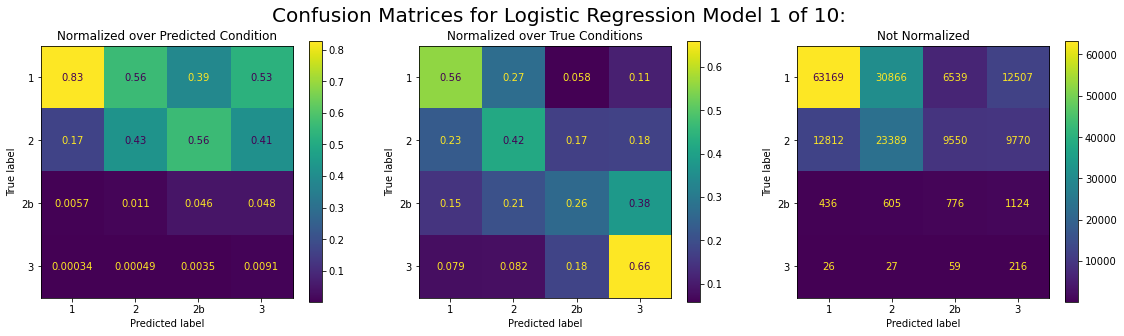

Logistic Regression Model 2 of 10:

              precision    recall  f1-score   support

           1   0.853631  0.507592  0.636628    113081
           2   0.410442  0.491184  0.447198     55521
          2b   0.048753  0.249235  0.081553      2941
           3   0.009589  0.676829  0.018910       328

    accuracy                       0.498193    171871
   macro avg   0.330604  0.481210  0.296072    171871
weighted avg   0.695080  0.498193  0.564757    171871



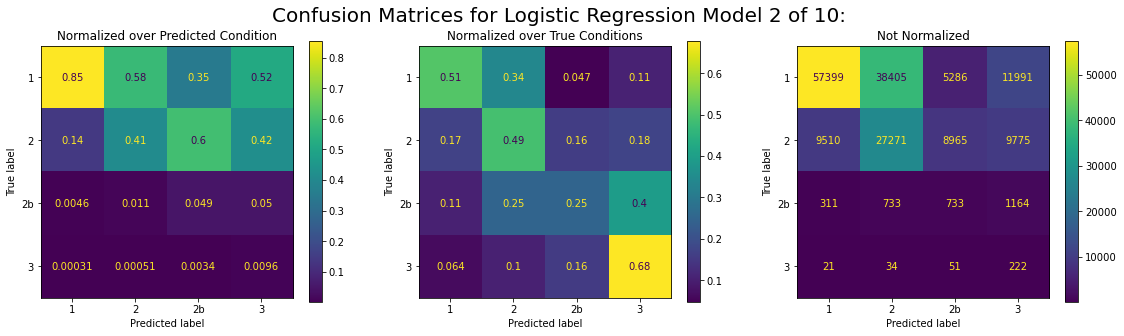

Logistic Regression Model 3 of 10:

              precision    recall  f1-score   support

           1   0.837034  0.534015  0.652039    113081
           2   0.416668  0.444571  0.430167     55521
          2b   0.047575  0.264196  0.080631      2941
           3   0.009190  0.676829  0.018134       328

    accuracy                       0.500777    171871
   macro avg   0.327617  0.479903  0.295243    171871
weighted avg   0.686151  0.500777  0.569379    171871



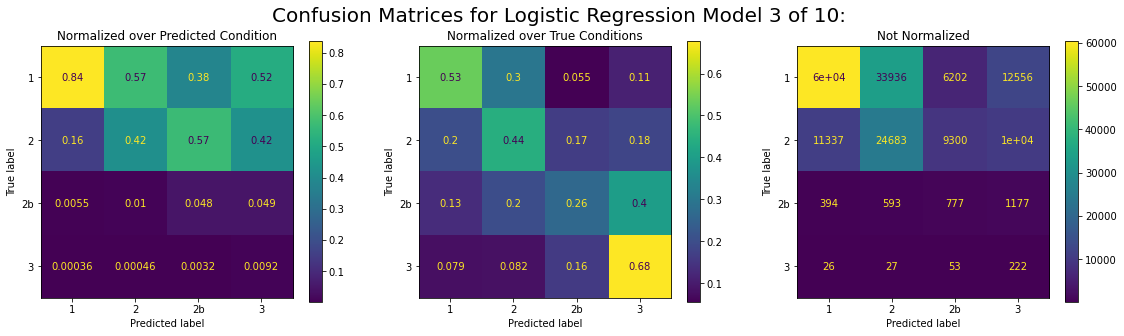

Logistic Regression Model 4 of 10:

              precision    recall  f1-score   support

           1   0.826455  0.547767  0.658852    113081
           2   0.424692  0.436357  0.430446     55521
          2b   0.046805  0.261476  0.079397      2941
           3   0.008999  0.643293  0.017750       328

    accuracy                       0.507061    171871
   macro avg   0.326738  0.472223  0.296611    171871
weighted avg   0.681769  0.507061  0.573929    171871



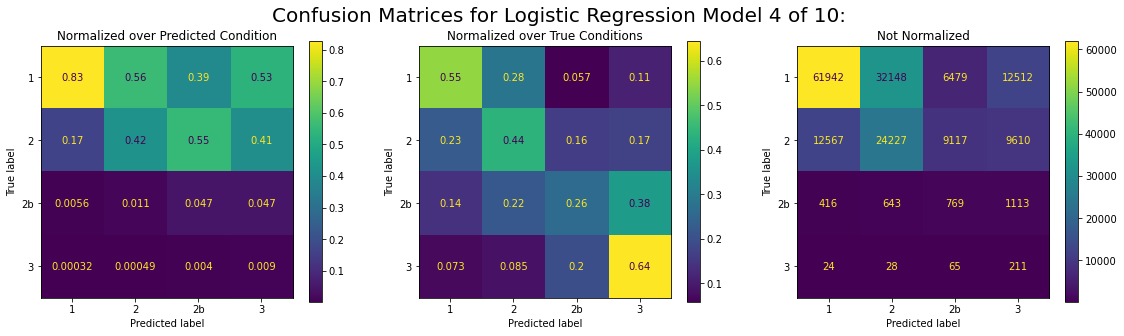

Logistic Regression Model 5 of 10:

              precision    recall  f1-score   support

           1   0.833048  0.541683  0.656489    113081
           2   0.421733  0.438627  0.430014     55521
          2b   0.046476  0.269976  0.079301      2941
           3   0.009144  0.655488  0.018037       328

    accuracy                       0.503959    171871
   macro avg   0.327600  0.476443  0.295960    171871
weighted avg   0.685145  0.503959  0.572234    171871



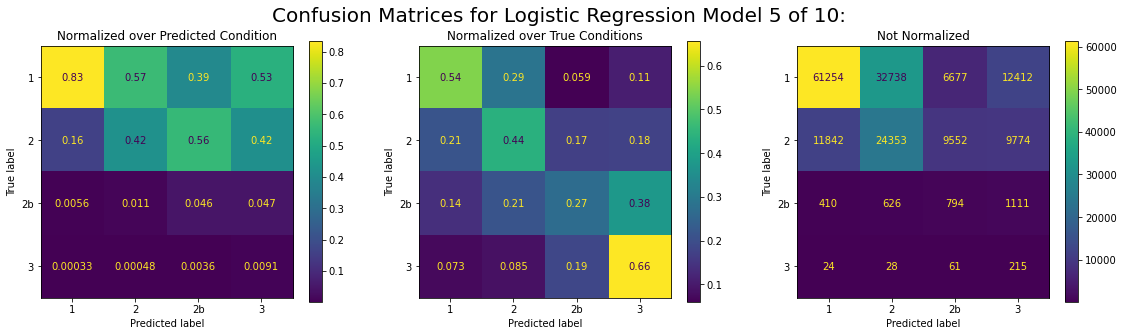

Logistic Regression Model 6 of 10:

              precision    recall  f1-score   support

           1   0.828708  0.556654  0.665968    113081
           2   0.421701  0.437006  0.429217     55521
          2b   0.048076  0.236994  0.079936      2941
           3   0.009297  0.676829  0.018342       328

    accuracy                       0.512762    171871
   macro avg   0.326945  0.476871  0.298366    171871
weighted avg   0.682307  0.512762  0.578225    171871



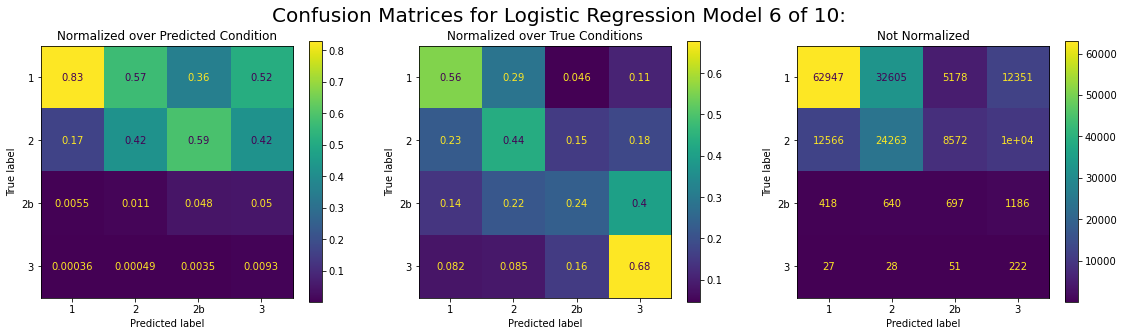

Logistic Regression Model 7 of 10:

              precision    recall  f1-score   support

           1   0.833687  0.546175  0.659977    113081
           2   0.418057  0.441022  0.429233     55521
          2b   0.051440  0.281877  0.087002      2941
           3   0.009091  0.640244  0.017927       328

    accuracy                       0.507863    171871
   macro avg   0.328068  0.477329  0.298535    171871
weighted avg   0.684463  0.507863  0.574408    171871



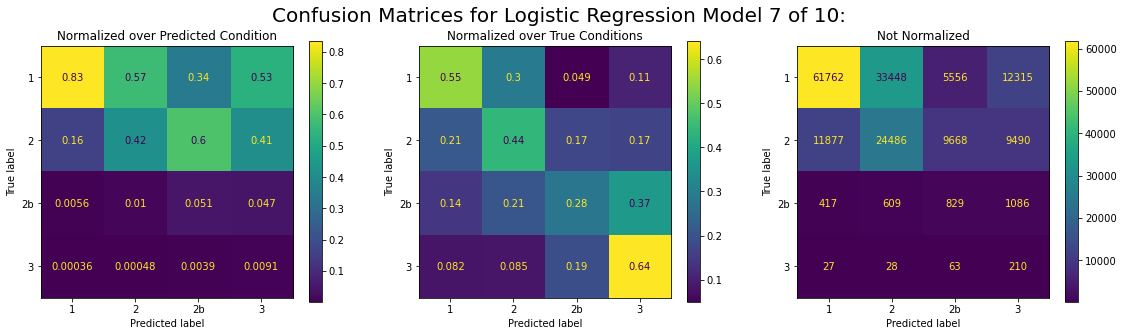

Logistic Regression Model 8 of 10:

              precision    recall  f1-score   support

           1   0.851464  0.509918  0.637847    113081
           2   0.412626  0.487725  0.447044     55521
          2b   0.051489  0.264536  0.086200      2941
           3   0.009140  0.652439  0.018027       328

    accuracy                       0.498822    171871
   macro avg   0.331180  0.478654  0.297279    171871
weighted avg   0.694406  0.498822  0.565588    171871



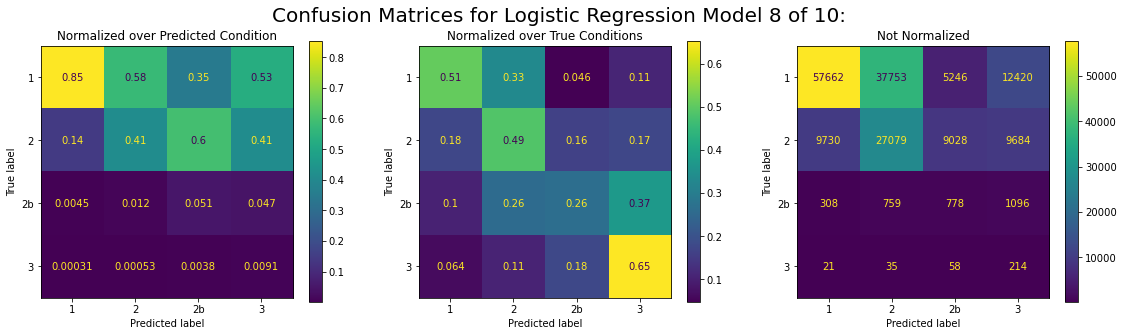

Logistic Regression Model 9 of 10:

              precision    recall  f1-score   support

           1   0.835503  0.540383  0.656292    113081
           2   0.415381  0.447686  0.430929     55521
          2b   0.049328  0.236994  0.081659      2941
           3   0.009368  0.707317  0.018492       328

    accuracy                       0.505565    171871
   macro avg   0.327395  0.483095  0.296843    171871
weighted avg   0.684758  0.505565  0.572441    171871



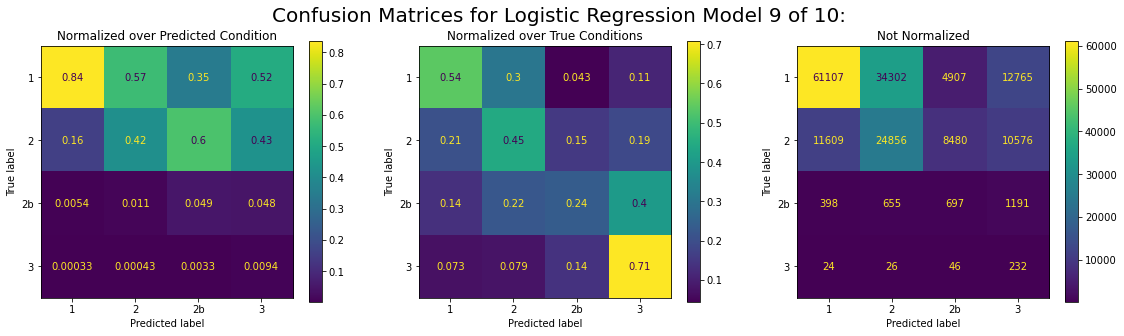

Logistic Regression Model 10 of 10:

              precision    recall  f1-score   support

           1   0.822558  0.572032  0.674793    113081
           2   0.427555  0.424182  0.425862     55521
          2b   0.042050  0.217613  0.070481      2941
           3   0.009552  0.667683  0.018834       328

    accuracy                       0.518389    171871
   macro avg   0.325429  0.470378  0.297492    171871
weighted avg   0.680050  0.518389  0.582786    171871



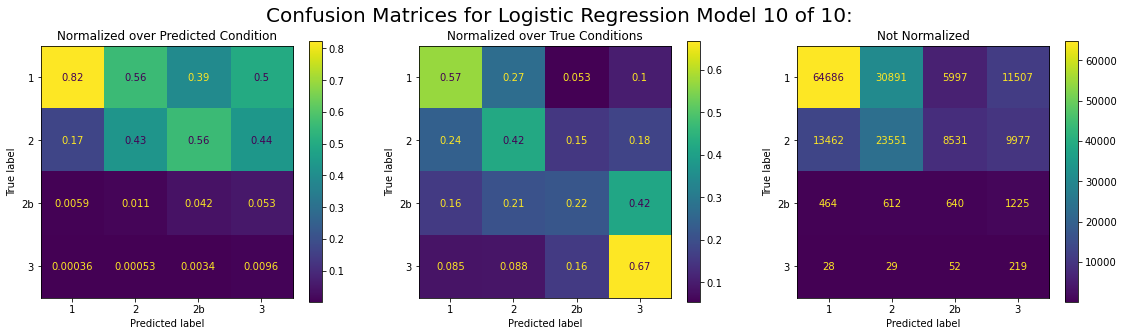

In [66]:
# For each logistic regression classifier in the cross-validation, print the macro recall, score report, and confusion matrices.
number_of_models = len(logistic_regression_scores['estimator'])
labels = ['1', '2', '2b', '3']
for index, logistic_regression_clf in zip(range(len(logistic_regression_scores['estimator'])), logistic_regression_scores['estimator']):
    y_test_predicted = logistic_regression_clf.predict(X_test)
    logistic_regression_recall_score = recall_score(y_test, y_test_predicted, average='macro', labels=labels)
    print('Logistic Regression Model %d of %d:' % (index + 1, number_of_models))
    print()
    print(classification_report(y_test, y_test_predicted, labels=labels, target_names=labels, digits=6))
        
    # Create a figure.
    fig = plt.figure(num=str(index + 1), figsize=(6.4 * 3, 4.8))
    fig.suptitle('Confusion Matrices for Logistic Regression Model %d of %d:' % (index + 1, number_of_models), fontsize=20)
    
    ax = plt.subplot(1, 3, 1)
    ax.set_title("Normalized over Predicted Condition", fontsize=12)
    plot_confusion_matrix(logistic_regression_clf, X_test, y_test, labels=labels, display_labels=labels, normalize='pred', ax=ax)
    
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Normalized over True Conditions", fontsize=12)
    plot_confusion_matrix(logistic_regression_clf, X_test, y_test, labels=labels, display_labels=labels, normalize='true', ax=ax)
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("Not Normalized", fontsize=12)
    plot_confusion_matrix(logistic_regression_clf, X_test, y_test, labels=labels, display_labels=labels, normalize=None, ax=ax)

    plt.show()

In [67]:
print_elapsed_time(notebook_start_time)

Elapsed time is 476.18225777801126 seconds.


In [68]:
# Report statistics of the models built for each fold of the cross-validation.
for key in sorted(linear_svc_scores.keys()):
    if key != 'estimator':
        print('%s: mean = %f, std = %f' % (key, np.mean(linear_svc_scores[key]), np.std(linear_svc_scores[key])), sep='')
        print('%s :%s' % (key, linear_svc_scores[key]), sep='')
        print()

fit_time: mean = 0.164342, std = 0.038130
fit_time :[0.1721108  0.13042498 0.08085942 0.16558409 0.22392273 0.1508832
 0.18738556 0.19174838 0.19549632 0.14500475]

score_time: mean = 0.084745, std = 0.028380
score_time :[0.07406664 0.04989552 0.05086112 0.12872052 0.10705328 0.10995317
 0.09514737 0.0849514  0.04065084 0.10615396]

test_f1_macro: mean = 0.455846, std = 0.035690
test_f1_macro :[0.46385353 0.37779183 0.45145997 0.45671085 0.48247777 0.50347609
 0.48209565 0.46126794 0.47387248 0.40545055]

test_f1_weighted: mean = 0.456042, std = 0.035563
test_f1_weighted :[0.46385353 0.37779183 0.45307417 0.45840106 0.48208956 0.5024424
 0.48195898 0.46232662 0.47346098 0.4050224 ]

test_precision_macro: mean = 0.462712, std = 0.037092
test_precision_macro :[0.47375661 0.37708333 0.46304113 0.45391845 0.49399351 0.5165855
 0.48459302 0.46077899 0.48014706 0.42322291]

test_precision_weighted: mean = 0.462863, std = 0.036885
test_precision_weighted :[0.47375661 0.37708333 0.46403126 0.4

Support Vector Machine Model 1 of 10:

              precision    recall  f1-score   support

           1   0.833217  0.547997  0.661158    113081
           2   0.427506  0.416257  0.421807     55521
          2b   0.039628  0.246515  0.068280      2941
           3   0.008750  0.670732  0.017274       328

    accuracy                       0.500515    171871
   macro avg   0.327275  0.470375  0.292130    171871
weighted avg   0.687004  0.500515  0.572464    171871



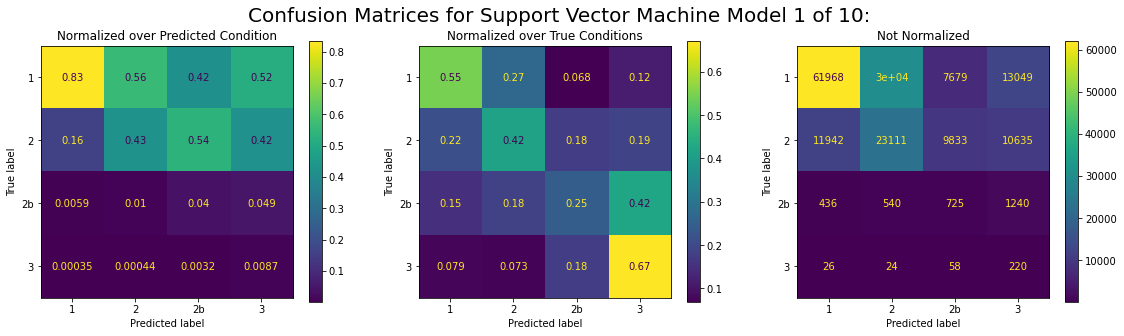

Support Vector Machine Model 2 of 10:

              precision    recall  f1-score   support

           1   0.857292  0.499845  0.631496    113081
           2   0.410531  0.504836  0.452826     55521
          2b   0.047612  0.213533  0.077863      2941
           3   0.009275  0.692073  0.018305       328

    accuracy                       0.496925    171871
   macro avg   0.331178  0.477572  0.295122    171871
weighted avg   0.697498  0.496925  0.563135    171871



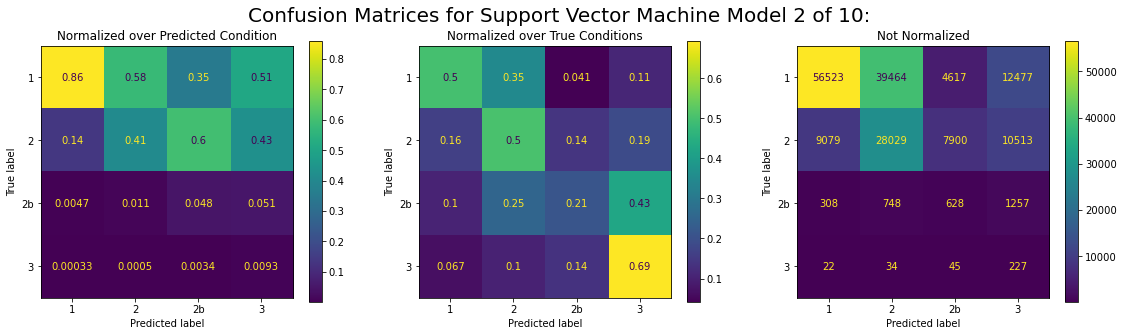

Support Vector Machine Model 3 of 10:

              precision    recall  f1-score   support

           1   0.838127  0.537314  0.654826    113081
           2   0.417107  0.452153  0.433924     55521
          2b   0.049307  0.239374  0.081770      2941
           3   0.008871  0.673780  0.017512       328

    accuracy                       0.504966    171871
   macro avg   0.328353  0.475656  0.297008    171871
weighted avg   0.687040  0.504966  0.572444    171871



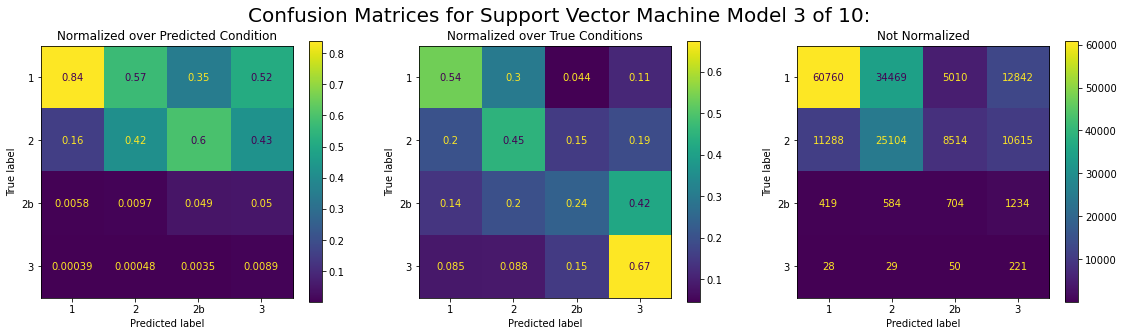

Support Vector Machine Model 4 of 10:

              precision    recall  f1-score   support

           1   0.829927  0.553745  0.664273    113081
           2   0.422803  0.440212  0.431332     55521
          2b   0.050705  0.233594  0.083323      2941
           3   0.008897  0.679878  0.017564       328

    accuracy                       0.511832    171871
   macro avg   0.328083  0.476857  0.299123    171871
weighted avg   0.683510  0.511832  0.577849    171871



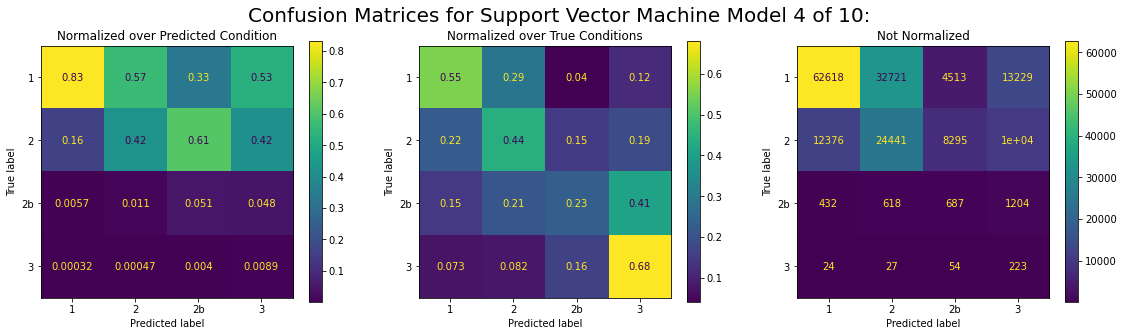

Support Vector Machine Model 5 of 10:

              precision    recall  f1-score   support

           1   0.842107  0.531495  0.651682    113081
           2   0.421605  0.440194  0.430699     55521
          2b   0.040767  0.240734  0.069726      2941
           3   0.009180  0.704268  0.018123       328

    accuracy                       0.497356    171871
   macro avg   0.328415  0.479173  0.292558    171871
weighted avg   0.690966  0.497356  0.569128    171871



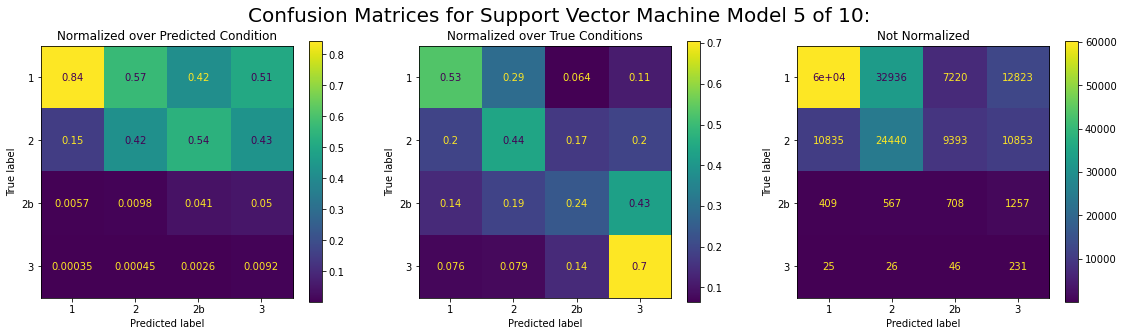

Support Vector Machine Model 6 of 10:

              precision    recall  f1-score   support

           1   0.832824  0.544910  0.658784    113081
           2   0.419965  0.444192  0.431739     55521
          2b   0.047505  0.222033  0.078265      2941
           3   0.009169  0.710366  0.018103       328

    accuracy                       0.507165    171871
   macro avg   0.327366  0.480375  0.296723    171871
weighted avg   0.684445  0.507165  0.574283    171871



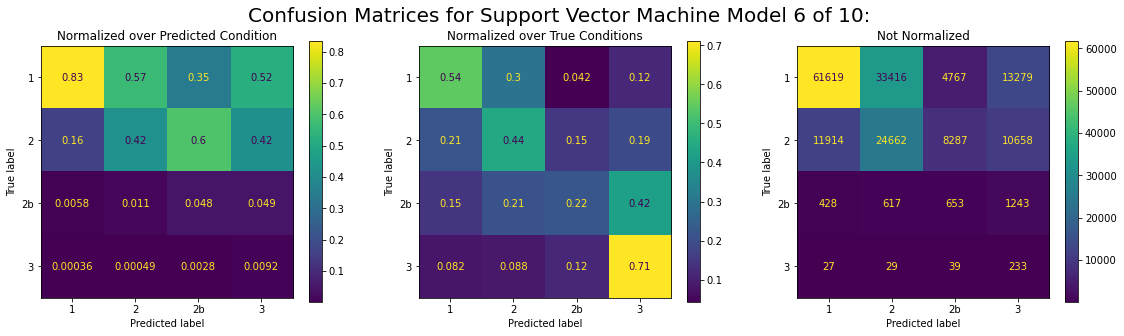

Support Vector Machine Model 7 of 10:

              precision    recall  f1-score   support

           1   0.834379  0.543301  0.658090    113081
           2   0.423119  0.428270  0.425679     55521
          2b   0.043414  0.250255  0.073992      2941
           3   0.008809  0.673780  0.017390       328

    accuracy                       0.501376    171871
   macro avg   0.327430  0.473902  0.293788    171871
weighted avg   0.686416  0.501376  0.571795    171871



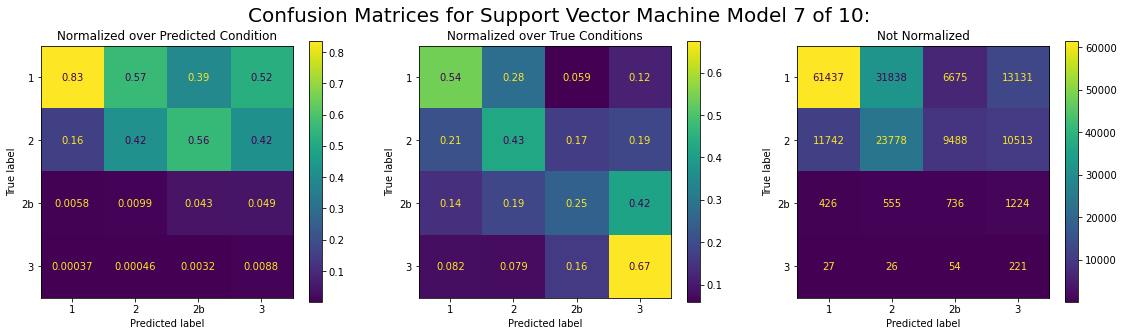

Support Vector Machine Model 8 of 10:

              precision    recall  f1-score   support

           1   0.834375  0.550234  0.663150    113081
           2   0.427037  0.426145  0.426591     55521
          2b   0.045192  0.265556  0.077239      2941
           3   0.008898  0.667683  0.017562       328

    accuracy                       0.505501    171871
   macro avg   0.328875  0.477404  0.296135    171871
weighted avg   0.687709  0.505501  0.575474    171871



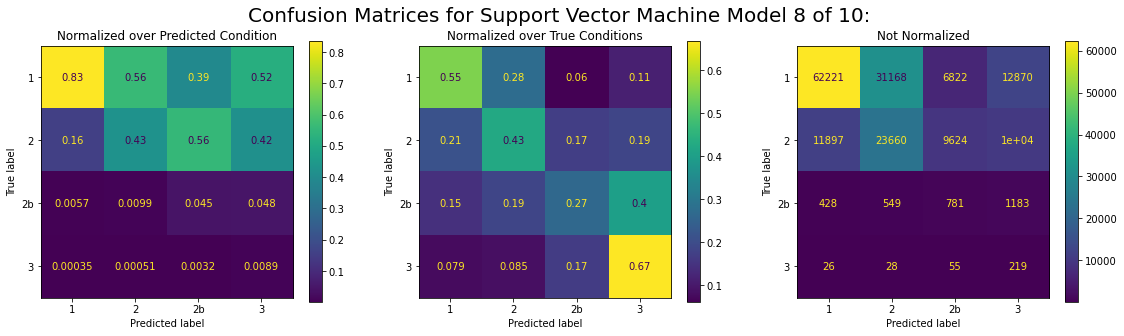

Support Vector Machine Model 9 of 10:

              precision    recall  f1-score   support

           1   0.837107  0.531981  0.650543    113081
           2   0.413386  0.473911  0.441584     55521
          2b   0.056159  0.202312  0.087914      2941
           3   0.008850  0.695122  0.017477       328

    accuracy                       0.507893    171871
   macro avg   0.328875  0.475832  0.299379    171871
weighted avg   0.685284  0.507893  0.572205    171871



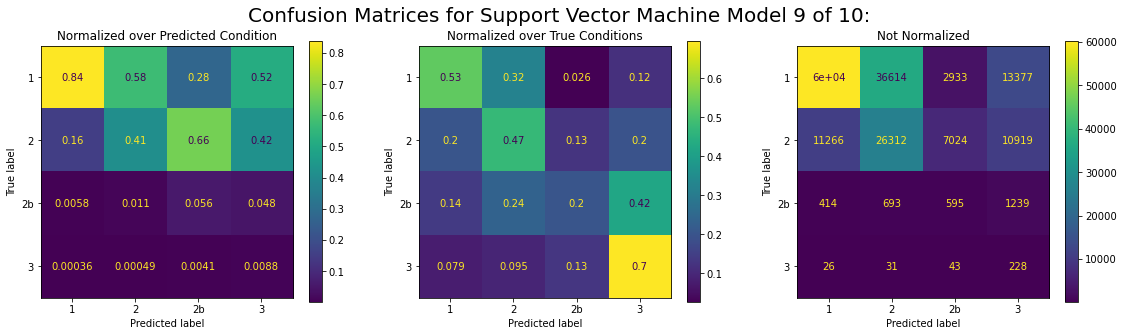

Support Vector Machine Model 10 of 10:

              precision    recall  f1-score   support

           1   0.822503  0.583865  0.682937    113081
           2   0.432374  0.396138  0.413464     55521
          2b   0.038704  0.223053  0.065963      2941
           3   0.009755  0.707317  0.019245       328

    accuracy                       0.517283    171871
   macro avg   0.325834  0.477593  0.295402    171871
weighted avg   0.681513  0.517283  0.584063    171871



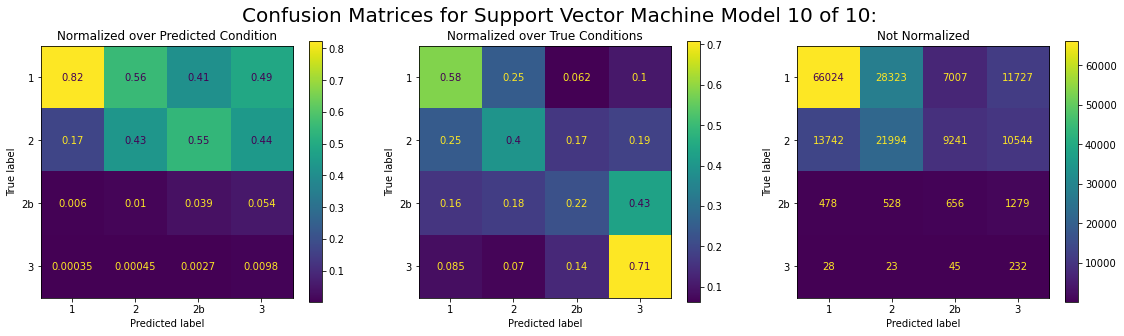

In [69]:
# For each support vector machine classifier in the cross-validation, print the macro recall, score report, and confusion matrices.
number_of_models = len(linear_svc_scores['estimator'])
labels = ['1', '2', '2b', '3']
for index, linear_svc_clf in zip(range(len(linear_svc_scores['estimator'])), linear_svc_scores['estimator']):
    y_test_predicted = linear_svc_clf.predict(X_test)
    linear_svc_recall_score = recall_score(y_test, y_test_predicted, average='macro', labels=labels)
    print('Support Vector Machine Model %d of %d:' % (index + 1, number_of_models))
    print()
    print(classification_report(y_test, y_test_predicted, labels=labels, target_names=labels, digits=6))
        
    # Create a figure.
    fig = plt.figure(num=str(index + 1), figsize=(6.4 * 3, 4.8))
    fig.suptitle('Confusion Matrices for Support Vector Machine Model %d of %d:' % (index + 1, number_of_models), fontsize=20)
    
    ax = plt.subplot(1,3,1)
    ax.set_title("Normalized over Predicted Condition", fontsize=12)
    plot_confusion_matrix(linear_svc_clf, X_test, y_test, labels=labels, display_labels=labels, normalize='pred', ax=ax)
    
    ax = plt.subplot(1,3,2)
    ax.set_title("Normalized over True Conditions", fontsize=12)
    plot_confusion_matrix(linear_svc_clf, X_test, y_test, labels=labels, display_labels=labels, normalize='true', ax=ax)
    
    ax = plt.subplot(1,3,3)
    ax.set_title("Not Normalized", fontsize=12)
    plot_confusion_matrix(linear_svc_clf, X_test, y_test, labels=labels, display_labels=labels, normalize=None, ax=ax)
    
    plt.show()

In [70]:
# Report statistics of the models built for each fold of the cross-validation.
for key in sorted(k_neighbors_scores.keys()):
    if key != 'estimator':
        print('%s: mean = %f, std = %f' % (key, np.mean(k_neighbors_scores[key]), np.std(k_neighbors_scores[key])), sep='')
        print('%s :%s' % (key, k_neighbors_scores[key]), sep='')
        print()

fit_time: mean = 0.027732, std = 0.013247
fit_time :[0.04672003 0.02056813 0.03489518 0.02230191 0.01542926 0.05714965
 0.01896286 0.02245474 0.01833797 0.02050018]

score_time: mean = 0.212126, std = 0.041679
score_time :[0.187608   0.20767903 0.19933224 0.20197415 0.32811689 0.24041319
 0.1961596  0.18279076 0.18674517 0.19044399]

test_f1_macro: mean = 0.419957, std = 0.032001
test_f1_macro :[0.39883041 0.45355949 0.41315186 0.37018112 0.44560775 0.36542735
 0.45595252 0.41459292 0.45314624 0.42911937]

test_f1_weighted: mean = 0.420126, std = 0.032019
test_f1_weighted :[0.39883041 0.45355949 0.41401562 0.37151015 0.44535381 0.36403657
 0.45665722 0.41517408 0.45250374 0.42961924]

test_neg_log_loss: mean = -5.376285, std = 0.723149
test_neg_log_loss :[-5.65355242 -4.54672209 -4.63481767 -5.92330088 -5.09449022 -4.67062957
 -5.33687272 -5.44545118 -7.11708217 -5.33993127]

test_precision_macro: mean = 0.421833, std = 0.032623
test_precision_macro :[0.39985246 0.44947681 0.41150173 0

k-Nearest Neighbor Model 1 of 10:

              precision    recall  f1-score   support

           1   0.773565  0.616514  0.686168    113081
           2   0.407222  0.354046  0.378777     55521
          2b   0.051645  0.285617  0.087473      2941
           3   0.013130  0.689024  0.025770       328

    accuracy                       0.526203    171871
   macro avg   0.311390  0.486300  0.294547    171871
weighted avg   0.641417  0.526203  0.575363    171871



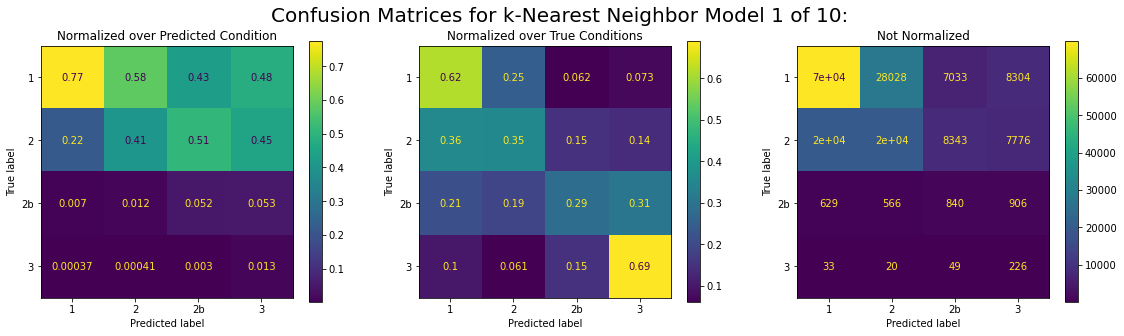

k-Nearest Neighbor Model 2 of 10:

              precision    recall  f1-score   support

           1   0.790512  0.577772  0.667603    113081
           2   0.397370  0.380379  0.388688     55521
          2b   0.044539  0.306698  0.077782      2941
           3   0.014220  0.685976  0.027862       328

    accuracy                       0.509574    171871
   macro avg   0.311660  0.487706  0.290484    171871
weighted avg   0.649265  0.509574  0.566189    171871



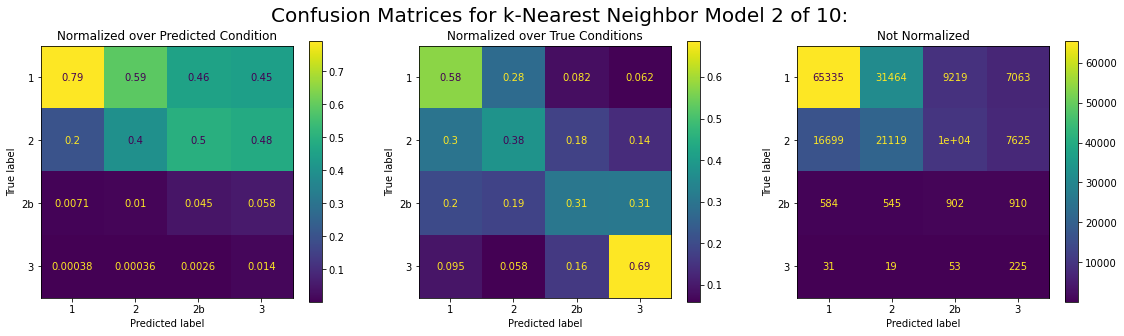

k-Nearest Neighbor Model 3 of 10:

              precision    recall  f1-score   support

           1   0.790656  0.575101  0.665868    113081
           2   0.394886  0.386322  0.390557     55521
          2b   0.051268  0.375383  0.090215      2941
           3   0.013582  0.570122  0.026532       328

    accuracy                       0.510691    171871
   macro avg   0.312598  0.476732  0.293293    171871
weighted avg   0.648671  0.510691  0.565861    171871



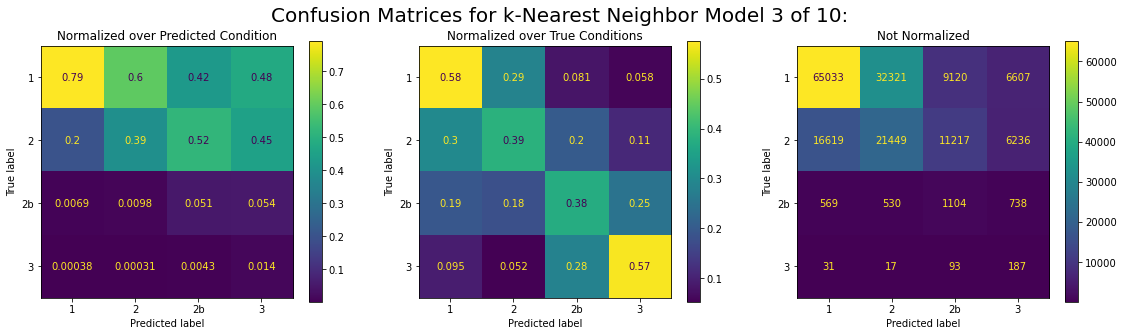

k-Nearest Neighbor Model 4 of 10:

              precision    recall  f1-score   support

           1   0.773222  0.627612  0.692850    113081
           2   0.411836  0.319122  0.359599     55521
          2b   0.045511  0.301598  0.079087      2941
           3   0.013031  0.698171  0.025585       328

    accuracy                       0.522514    171871
   macro avg   0.310900  0.486626  0.289280    171871
weighted avg   0.642577  0.522514  0.573421    171871



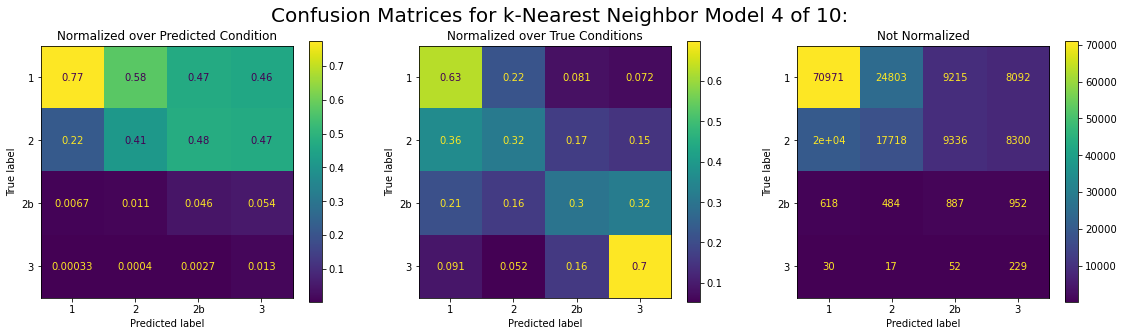

k-Nearest Neighbor Model 5 of 10:

              precision    recall  f1-score   support

           1   0.773819  0.628877  0.693859    113081
           2   0.413177  0.328578  0.366053     55521
          2b   0.042925  0.303978  0.075227      2941
           3   0.014675  0.670732  0.028723       328

    accuracy                       0.526389    171871
   macro avg   0.311149  0.483041  0.290966    171871
weighted avg   0.643362  0.526389  0.576110    171871



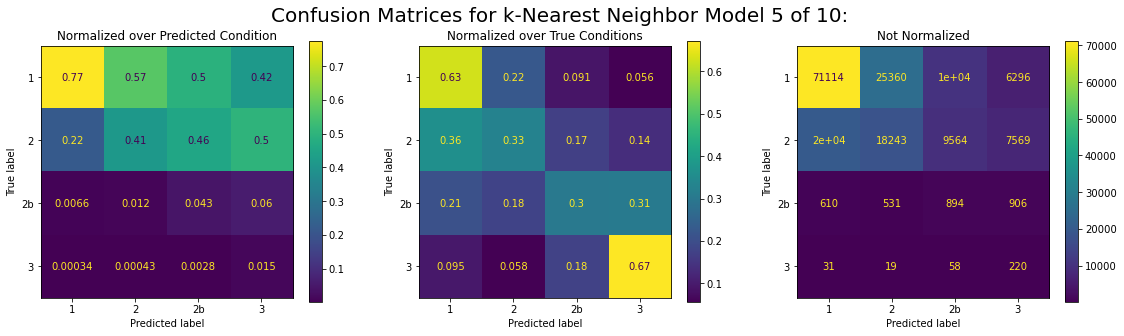

k-Nearest Neighbor Model 6 of 10:

              precision    recall  f1-score   support

           1   0.785592  0.605911  0.684151    113081
           2   0.423682  0.406711  0.415023     55521
          2b   0.043876  0.273716  0.075629      2941
           3   0.015757  0.625000  0.030739       328

    accuracy                       0.535914    171871
   macro avg   0.317227  0.477835  0.301386    171871
weighted avg   0.654520  0.535914  0.585552    171871



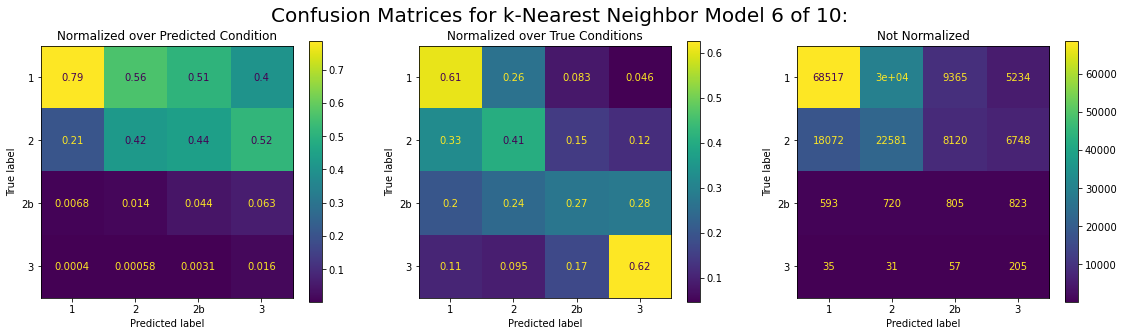

k-Nearest Neighbor Model 7 of 10:

              precision    recall  f1-score   support

           1   0.778658  0.615285  0.687397    113081
           2   0.403266  0.346932  0.372984     55521
          2b   0.047026  0.301598  0.081365      2941
           3   0.014287  0.692073  0.027995       328

    accuracy                       0.523375    171871
   macro avg   0.310809  0.488972  0.292435    171871
weighted avg   0.643414  0.523375  0.574201    171871



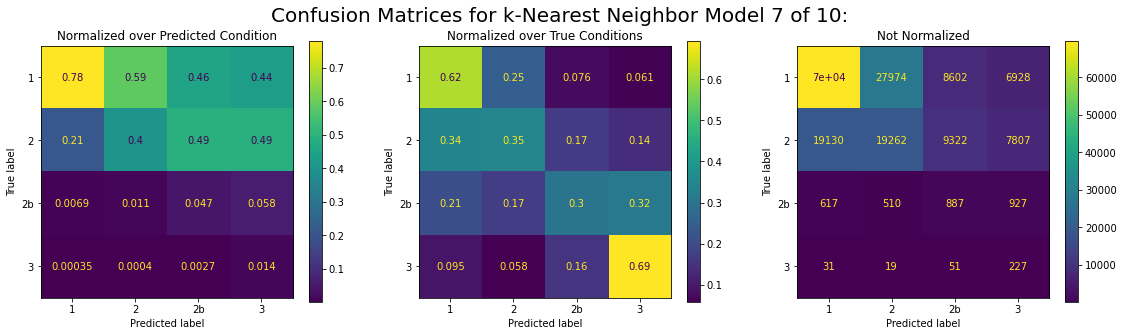

k-Nearest Neighbor Model 8 of 10:

              precision    recall  f1-score   support

           1   0.791651  0.574544  0.665847    113081
           2   0.395424  0.386286  0.390802     55521
          2b   0.047450  0.263856  0.080435      2941
           3   0.012285  0.719512  0.024158       328

    accuracy                       0.508690    171871
   macro avg   0.311703  0.486050  0.290310    171871
weighted avg   0.649432  0.508690  0.565755    171871



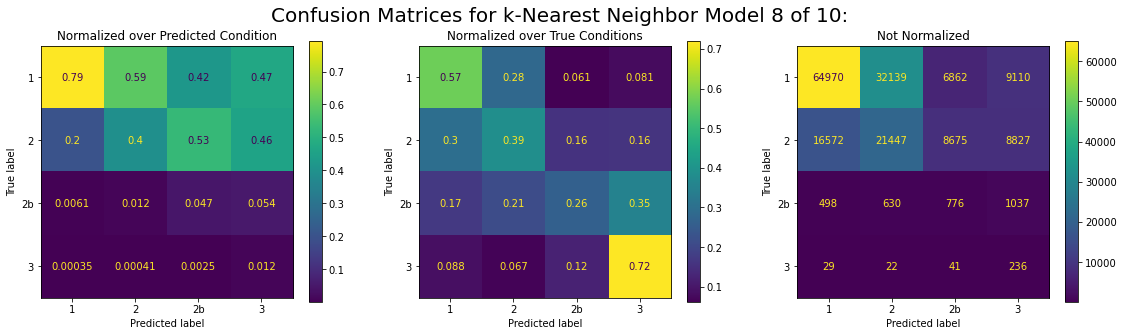

k-Nearest Neighbor Model 9 of 10:

              precision    recall  f1-score   support

           1   0.781238  0.606256  0.682713    113081
           2   0.406680  0.358981  0.381345     55521
          2b   0.042991  0.283237  0.074652      2941
           3   0.014365  0.689024  0.028143       328

    accuracy                       0.521007    171871
   macro avg   0.311319  0.484375  0.291713    171871
weighted avg   0.646145  0.521007  0.573705    171871



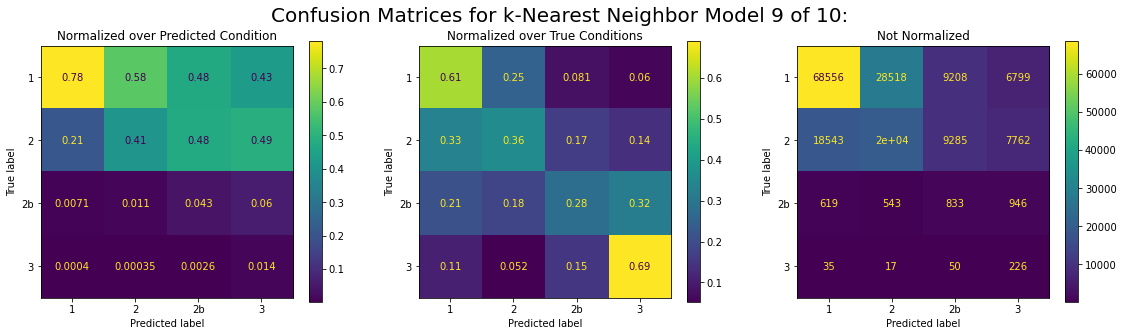

k-Nearest Neighbor Model 10 of 10:

              precision    recall  f1-score   support

           1   0.791152  0.581150  0.670082    113081
           2   0.399916  0.395544  0.397718     55521
          2b   0.045695  0.326420  0.080167      2941
           3   0.016301  0.640244  0.031792       328

    accuracy                       0.516946    171871
   macro avg   0.313266  0.485839  0.294940    171871
weighted avg   0.650533  0.516946  0.570786    171871



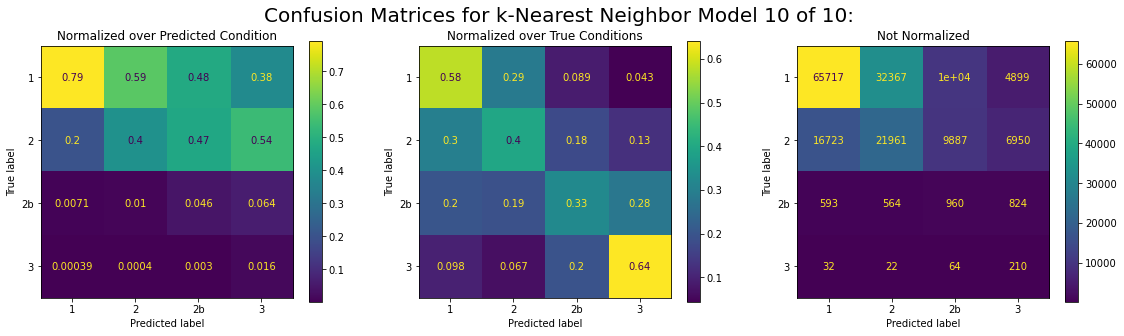

In [71]:
# For each k-Nearest Neighbor classifier in the cross-validation, print the macro recall, score report, and confusion matrices.
number_of_models = len(k_neighbors_scores['estimator'])
labels = ['1', '2', '2b', '3']
for index, knn_clf in zip(range(len(k_neighbors_scores['estimator'])), k_neighbors_scores['estimator']):
    y_test_predicted = knn_clf.predict(X_test)
    knn_recall_score = recall_score(y_test, y_test_predicted, average='macro', labels=labels)
    print('k-Nearest Neighbor Model %d of %d:' % (index + 1, number_of_models))
    print()
    print(classification_report(y_test, y_test_predicted, labels=labels, target_names=labels, digits=6))
        
    # Create a figure.
    fig = plt.figure(num=str(index + 1), figsize=(6.4 * 3, 4.8))
    fig.suptitle('Confusion Matrices for k-Nearest Neighbor Model %d of %d:' % (index + 1, number_of_models), fontsize=20)
    
    ax = plt.subplot(1, 3, 1)
    ax.set_title("Normalized over Predicted Condition", fontsize=12)
    plot_confusion_matrix(knn_clf, X_test, y_test, labels=labels, display_labels=labels, normalize='pred', ax=ax)
    
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Normalized over True Conditions", fontsize=12)
    plot_confusion_matrix(knn_clf, X_test, y_test, labels=labels, display_labels=labels, normalize='true', ax=ax)
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("Not Normalized", fontsize=12)
    plot_confusion_matrix(knn_clf, X_test, y_test, labels=labels, display_labels=labels, normalize=None, ax=ax)

    plt.show()

In [72]:
print('Reports and graphics generated in %f seconds' % (elapsed_time(t0)))

Reports and graphics generated in 3107.578196 seconds


In [73]:
print_elapsed_time(notebook_start_time)

Elapsed time is 3264.569233936956 seconds.
